In [1]:
%load_ext autoreload
%autoreload 2

# import libraries
import numpy as np
%matplotlib inline
import matplotlib.pyplot as plt
import pyshtools as pysh
import SLmod as SL
import RFmod as RF
from numpy import pi as pi


#set plotting parameters
plt.rc('xtick', labelsize=18) 
plt.rc('ytick', labelsize=18) 
font = {'size'   : 20}
plt.rc('font', **font)
plt.rcParams['figure.figsize'] = [16, 8]
                                  

In [2]:
# get values for some physical parameters
b = SL.b
g = SL.g
G = SL.G
rhoi = SL.rhoi
rhow = SL.rhow
rhos = SL.rhos

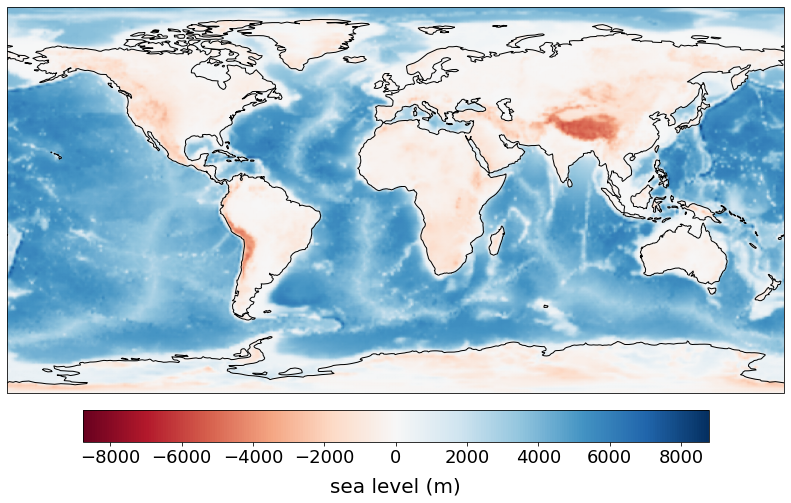

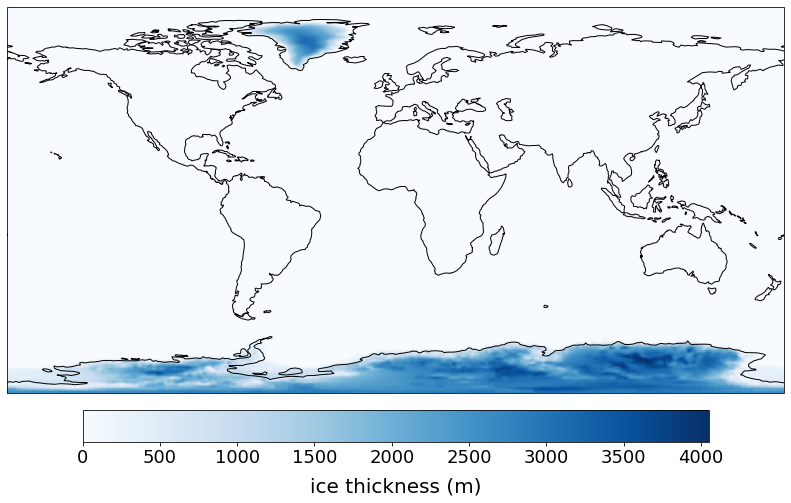

In [3]:
# set the truncation degree
L=256

# read in the present day sea level and ice thickness
sl0,ice0 = SL.get_sl_ice_data(L)

# plot these fields
SL.plot(sl0,label = 'sea level (m)')
SL.plot(ice0,label = 'ice thickness (m)',clim_pos = True)

# compute the ocean function
C = SL.ocean_function(sl0,ice0)

# get the ocean mask
ocean_mask = SL.ocean_mask(sl0,ice0)

# get the ice mask
ice_mask = SL.ice_mask(sl0,ice0)

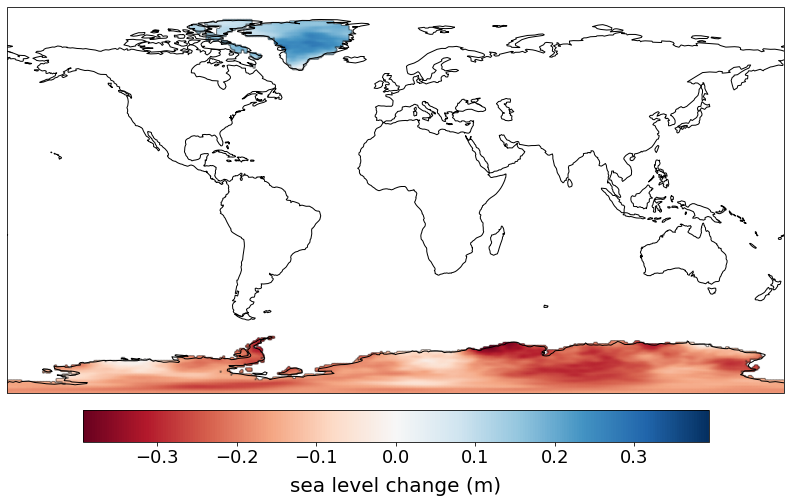

iteration =  1 relative change =  0.046891575476932984
iteration =  2 relative change =  0.0060769306143279396
iteration =  3 relative change =  0.001003043910651235
iteration =  4 relative change =  0.00018673157805061146
iteration =  5 relative change =  3.7518792369907395e-05
iteration =  6 relative change =  8.02446933604838e-06
iteration =  7 relative change =  1.8206580222623536e-06
iteration =  8 relative change =  4.379262394806894e-07
iteration =  9 relative change =  1.1155177092859386e-07
iteration =  10 relative change =  2.995930293866474e-08
iteration =  11 relative change =  8.430253234023392e-09


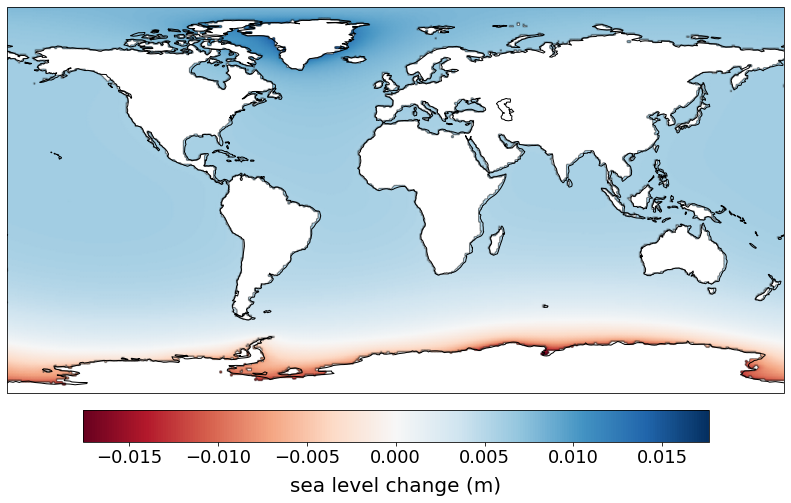

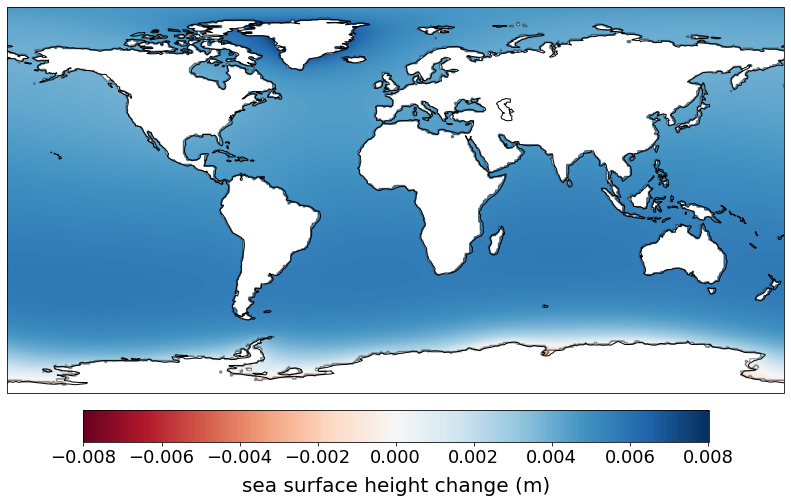

In [26]:
# Set the covariance for the random field
Q = RF.sobolev_covariance(L,s = 2,mu = 0.2, b = b)

# Generate the random ice model
zeta = -rhoi*SL.random_ice_model(sl0,ice0,Q,b = b)

# Scale the load to a given value of \Delta GMSL
GMSL = 0.005
zeta = GMSL * zeta / SL.bathtub(C,zeta)

# plot the change in ice thickness
SL.plot(ice_mask*zeta / rhoi,label = r'sea level change (m)')

# Solve the sea level equation
sl,u,phi,om,psi = SL.fingerprint(C,zeta)

# plot the result
SL.plot(ocean_mask*sl,label = r'sea level change (m)')

# Compute and plot the sea surface height change
ssh = sl + u + psi/SL.g
SL.plot(ocean_mask*ssh,label = r'sea surface height change (m)')


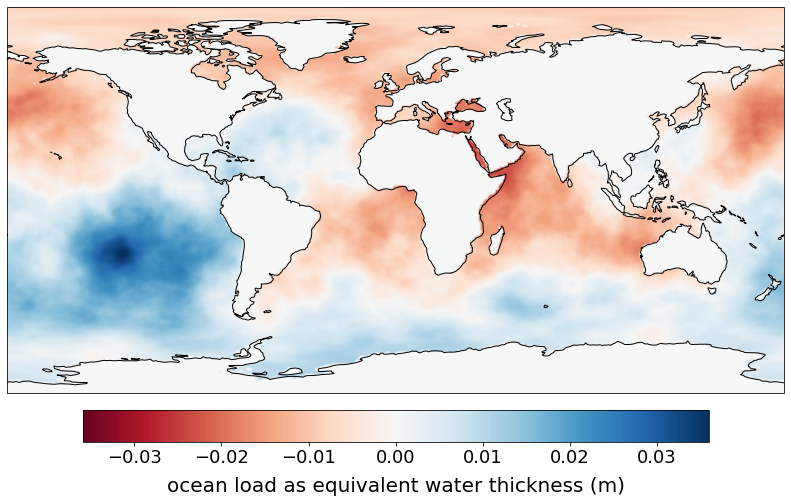

iteration =  1 relative change =  0.19439482553052695
iteration =  2 relative change =  0.043244430463598126
iteration =  3 relative change =  0.010149859957502325
iteration =  4 relative change =  0.002457595342956588
iteration =  5 relative change =  0.0006119112809413162
iteration =  6 relative change =  0.00015689240116498947
iteration =  7 relative change =  4.1505510392266655e-05
iteration =  8 relative change =  1.1339598980366247e-05
iteration =  9 relative change =  3.196762372316468e-06
iteration =  10 relative change =  9.276767007983081e-07
iteration =  11 relative change =  2.760667979544821e-07
iteration =  12 relative change =  8.39034848910103e-08
iteration =  13 relative change =  2.5928624092191218e-08
iteration =  14 relative change =  8.116561399702122e-09


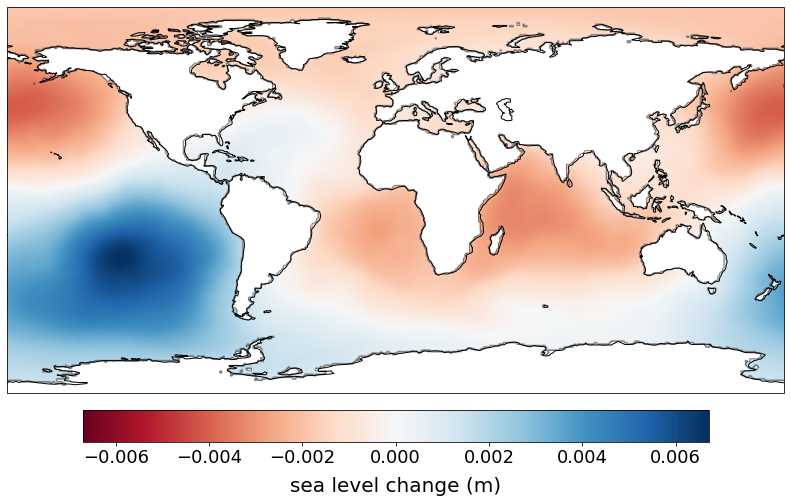

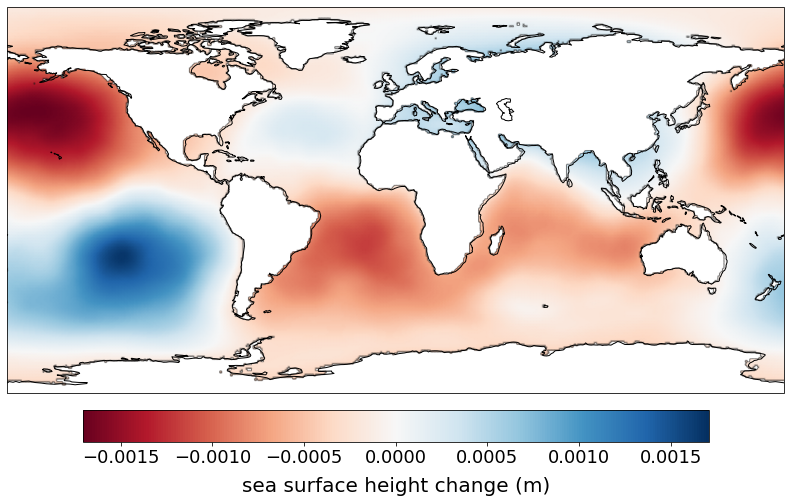

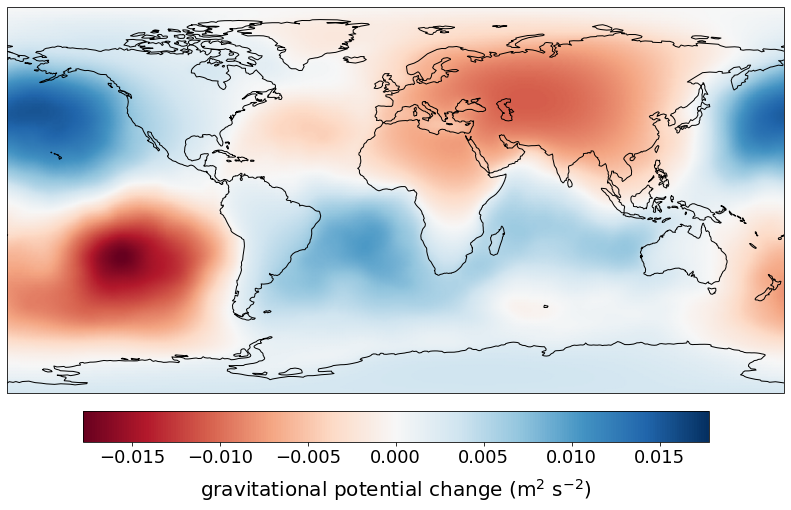

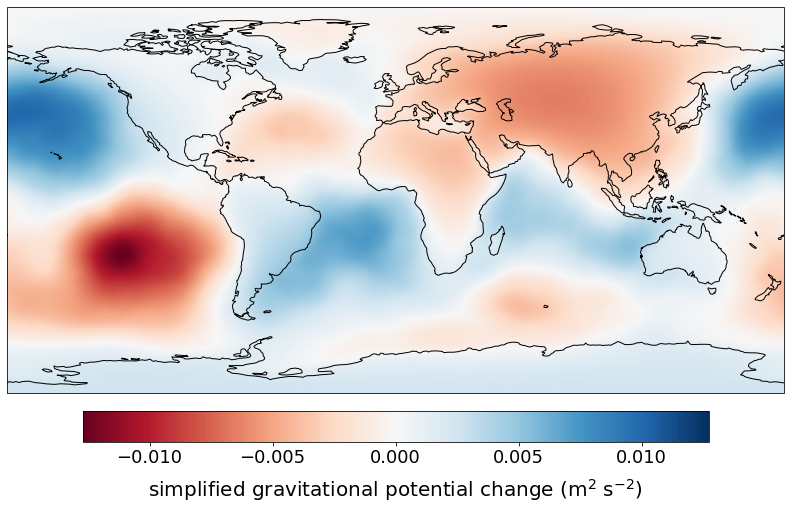

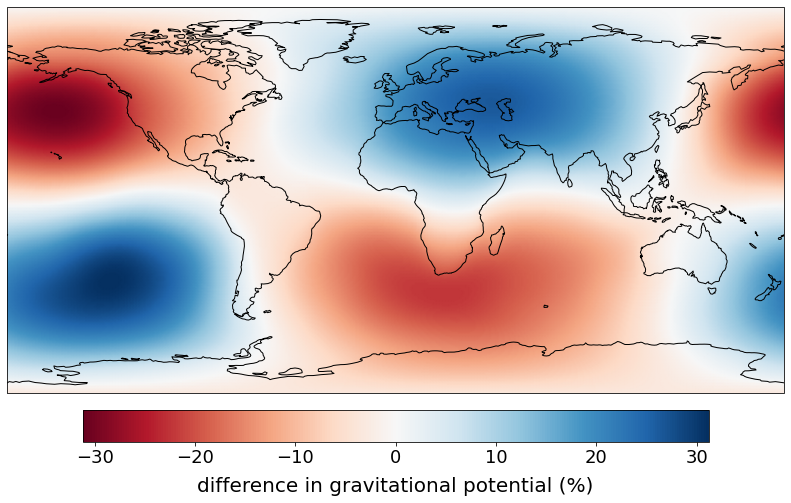

In [35]:
# Set the covariance for the random field
Q = RF.sobolev_covariance(L, std = 0.01, s = 2 ,mu = 0.5,  b = b)

# Generate a random ocean load
zeta =  SL.random_ocean_load(C,Q,b = b)
SL.plot(zeta/ rhow,label = "ocean load as equivalent water thickness (m)")


# Solve the sea level equation
sl,u,phi,om,psi = SL.fingerprint(C,zeta)

# plot the sea level change
SL.plot(ocean_mask*sl,label = r'sea level change (m)')

# Compute and plot the sea surface height change
ssh = sl + u + psi/SL.g
SL.plot(ocean_mask*ssh,label = r'sea surface height change (m)')

# plot the gravitational potential change
SL.plot(phi,label = r'gravitational potential change (m$^{2}$ s$^{-2}$)')

# get the simplified loading response
u2,phi2 = SL.loading_response(zeta)
SL.plot(phi2,label = r'simplified gravitational potential change (m$^{2}$ s$^{-2}$)')
norm = np.max(np.abs(phi.data))
SL.plot(100*(phi2-phi)/norm,label = r'difference in gravitational potential (%)')